# Exploratory Data Analysis

In [4]:
import pandas as pd
import sys
import os

# Agrega el path al directorio raíz del proyecto
sys.path.append(os.path.abspath(".."))

# Importar la clase par ver duplicados
from scripts.duplicados import Duplicados
from scripts.blackAndWhite import BlackAndWhite

In [5]:
# Extraer datos de un archivo CSV
df = pd.read_csv('../data/raw/eventos.csv')
normal = pd.read_csv('../data/raw/normal.csv')

In [77]:
import cv2
# Crea una función para ver la duración de cada video 
def duracion_video(video, evento):
    video_path = f"../data/Anomaly-Detection-Dataset/Anomaly-Videos/{evento}/{video}"
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duracion = frame_count/fps
    return duracion

## Resumen de datos

In [6]:
df.head()

,Video,Evento,PCB,Start_Frame,End_Frame
0,Abuse001_x264.mp4,Abuse,237.0,327.0,397.0
1,Abuse002_x264.mp4,Abuse,NaN,174.0,266.0
2,Abuse003_x264.mp4,Abuse,351.0,951.0,3614.0
3,Abuse004_x264.mp4,Abuse,558.0,898.0,5779.0
4,Abuse005_x264.mp4,Abuse,210.0,717.0,933.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Video        700 non-null    object 
 1   Evento       700 non-null    object 
 2   PCB          194 non-null    float64
 3   Start_Frame  340 non-null    float64
 4   End_Frame    340 non-null    float64
dtypes: float64(3), object(2)
memory usage: 27.5+ KB


### Nulos

In [8]:
df.isna().sum()

Video            0
Evento           0
PCB            506
Start_Frame    360
End_Frame      360
dtype: int64

In [9]:
# Si Start_Frame no es nulo, cuantos PCB son nulos
df[df['Start_Frame'].notnull()]['PCB'].isna().sum()

146

In [10]:
506-146

360

In [11]:
# Elimina todos los registros donde Start_Frame es nulo
df = df[df['Start_Frame'].notnull()]

In [12]:
df.isna().sum()

Video            0
Evento           0
PCB            146
Start_Frame      0
End_Frame        0
dtype: int64

In [13]:
# Rellena los nulos con 0
df = df.fillna(0)

In [14]:
df.isna().sum()

Video          0
Evento         0
PCB            0
Start_Frame    0
End_Frame      0
dtype: int64

In [15]:
df.shape

(340, 5)

### Duplicados

In [16]:
# Ver los duplicados
df.duplicated().sum()

0

In [17]:
# Ver los duplicados 
duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos",df)

In [18]:
df_duplicados = duplicados.encontrar_duplicados()

[DUPLICADO] Robbery138_x264.mp4 es similar a Assault050_x264.mp4


## Análisis Univariado

<Axes: >

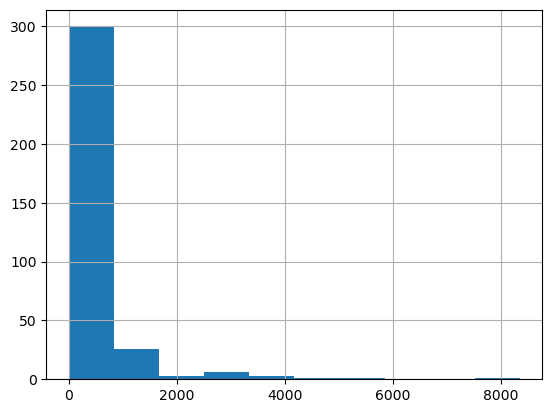

In [19]:
# Histograma de PCB
df['PCB'].hist()

<Axes: >

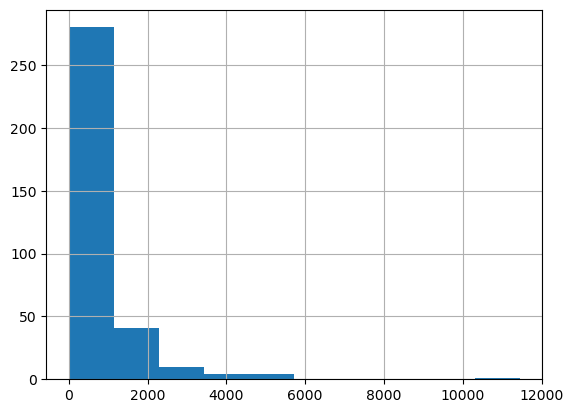

In [20]:
# Histograma de Start_Frame
df['Start_Frame'].hist()

<Axes: >

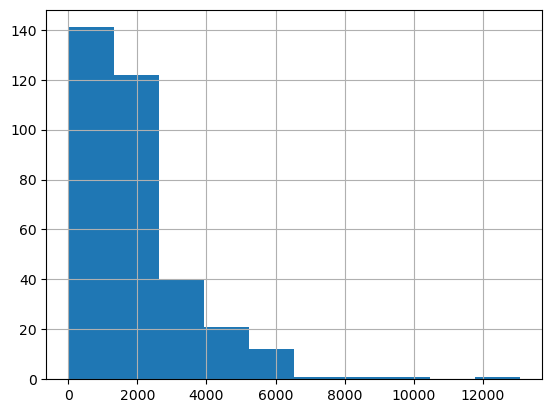

In [21]:
# Histograma de End_Frame
df['End_Frame'].hist()

In [22]:
# Crea columna diferencia y resta Start_Frame - PCB
df['diferencia'] = df['Start_Frame'] - df['PCB']

<Axes: >

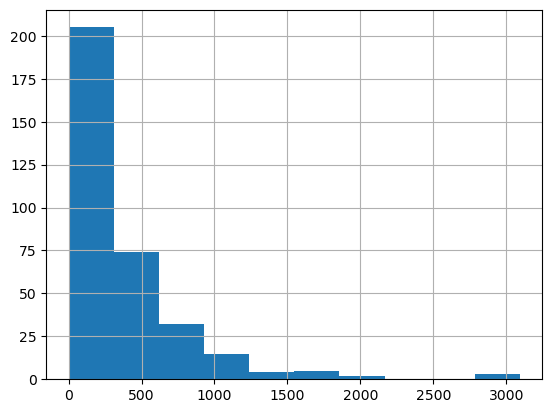

In [23]:
# Histograma de la columna diferencia
df['diferencia'].hist()

<Axes: xlabel='Evento'>

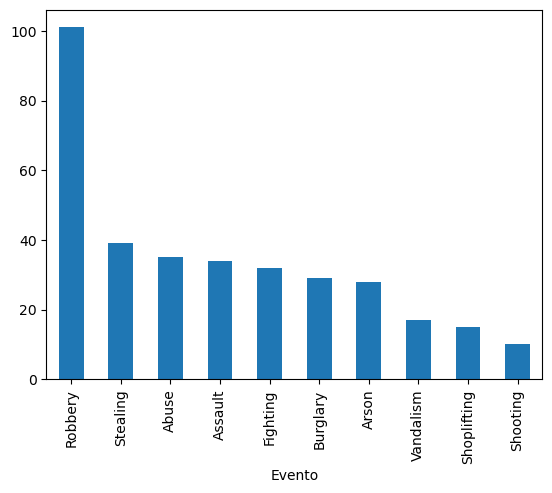

In [24]:
# Histograma de la columna Evento
df['Evento'].value_counts().plot(kind='bar')

In [25]:
df.shape

(340, 6)

In [26]:
duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos",df)

In [27]:
duplicados.encontrar_duplicados()

[DUPLICADO] Robbery138_x264.mp4 es similar a Assault050_x264.mp4


,Video,Evento,PCB,Start_Frame,End_Frame,diferencia
437,Robbery138_x264.mp4,Robbery,0.0,86.0,623.0,86.0


In [28]:
bw_videos = BlackAndWhite("../data/Anomaly-Detection-Dataset/Anomaly-Videos", df)

In [29]:
df_bw = bw_videos.encontrar_bw()

[Blanco y Negro] Video: Arson006_x264.mp4
[Blanco y Negro] Video: Arson036_x264.mp4
[Blanco y Negro] Video: Assault014_x264.mp4
[Blanco y Negro] Video: Assault017_x264.mp4
[Blanco y Negro] Video: Burglary022_x264.mp4
[Blanco y Negro] Video: Stealing020_x264.mp4
[Blanco y Negro] Video: Stealing061_x264.mp4
[Blanco y Negro] Video: Stealing075_x264.mp4
[Blanco y Negro] Video: Stealing102_x264.mp4


In [30]:
df_bw

,Video,Evento,PCB,Start_Frame,End_Frame,diferencia
54,Arson006_x264.mp4,Arson,675.0,788.0,2256.0,113.0
83,Arson036_x264.mp4,Arson,0.0,85.0,1588.0,85.0
113,Assault014_x264.mp4,Assault,110.0,313.0,1253.0,203.0
116,Assault017_x264.mp4,Assault,0.0,2.0,20.0,2.0
171,Burglary022_x264.mp4,Burglary,269.0,452.0,2333.0,183.0
567,Stealing020_x264.mp4,Stealing,1507.0,1665.0,5839.0,158.0
601,Stealing061_x264.mp4,Stealing,0.0,519.0,2217.0,519.0
614,Stealing075_x264.mp4,Stealing,0.0,90.0,5162.0,90.0
637,Stealing102_x264.mp4,Stealing,75.0,409.0,1029.0,334.0


In [31]:
# Ver cuantas filas tiene el dataframe
bw = df_bw.shape
normal = df.shape

<Axes: ylabel='cantidad'>

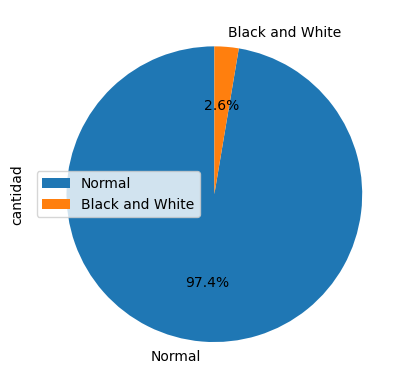

In [32]:
# Gráfico pie de bw[0] y normal[0] - bw[0]
df_pie = pd.DataFrame({'tipo': ['Normal','Black and White'], 'cantidad': [normal[0]-bw[0], bw[0]]})
df_pie.plot.pie(y='cantidad', labels=df_pie['tipo'], autopct='%1.1f%%', startangle=90)

In [76]:
# Ver la duración de los videos
df['duracion'] = df.apply(lambda x: duracion_video(x['Video'], x['Evento']), axis=1)

## Normal Videos

In [33]:
# Lista de los videos en ../data/Anomaly-Detection-Dataset/Anomaly-Videos/Normal
videos = os.listdir("../data/Anomaly-Detection-Dataset/Anomaly-Videos/Normal")

In [35]:
# Ignora los archivos ._
videos = [video for video in videos if not video.startswith("._")]

In [36]:
videos

['Normal_Videos296_x264.mp4',
 'Normal_Videos457_x264.mp4',
 'Normal_Videos380_x264.mp4',
 'Normal_Videos074_x264.mp4',
 'Normal_Videos407_x264.mp4',
 'Normal_Videos320_x264.mp4',
 'Normal_Videos162_x264.mp4',
 'Normal_Videos470_x264.mp4',
 'Normal_Videos115_x264.mp4',
 'Normal_Videos007_x264.mp4',
 'Normal_Videos282_x264.mp4',
 'Normal_Videos113_x264.mp4',
 'Normal_Videos235_x264.mp4',
 'Normal_Videos233_x264.mp4',
 'Normal_Videos029_x264.mp4',
 'Normal_Videos237_x264.mp4',
 'Normal_Videos178_x264.mp4',
 'Normal_Videos402_x264.mp4',
 'Normal_Videos204_x264.mp4',
 'Normal_Videos011_x264.mp4',
 'Normal_Videos094_x264.mp4',
 'Normal_Videos252_x264.mp4',
 'Normal_Videos288_x264.mp4',
 'Normal_Videos462_x264.mp4',
 'Normal_Videos038_x264.mp4',
 'Normal_Videos419_x264.mp4',
 'Normal_Videos298_x264.mp4',
 'Normal_Videos153_x264.mp4',
 'Normal_Videos335_x264.mp4',
 'Normal_Videos088_x264.mp4',
 'Normal_Videos362_x264.mp4',
 'Normal_Videos301_x264.mp4',
 'Normal_Videos465_x264.mp4',
 'Normal_V

In [37]:
# Sort videos
videos.sort()

In [39]:
len(videos)

430

In [57]:
df_normal = pd.DataFrame(videos, columns=['Video'])
df_normal['Evento'] = 'Normal'
df_normal['PCB'] = 0
df_normal['Start_Frame'] = 0
df_normal['End_Frame'] = 0


In [78]:
df_normal

,Video,Evento,PCB,Start_Frame,End_Frame,duracion
0,Normal_Videos001_x264.mp4,Normal,0,0,0,18.133333
1,Normal_Videos002_x264.mp4,Normal,0,0,0,55.433333
2,Normal_Videos004_x264.mp4,Normal,0,0,0,30.566667
3,Normal_Videos005_x264.mp4,Normal,0,0,0,12.866667
4,Normal_Videos007_x264.mp4,Normal,0,0,0,32.833333
...,...,...,...,...,...,...
425,Normal_Videos477_x264.mp4,Normal,0,0,0,67.200000
426,Normal_Videos479_x264.mp4,Normal,0,0,0,1320.166667
427,Normal_Videos480_x264.mp4,Normal,0,0,0,74.166667
428,Normal_Videos481_x264.mp4,Normal,0,0,0,300.000000


<Axes: >

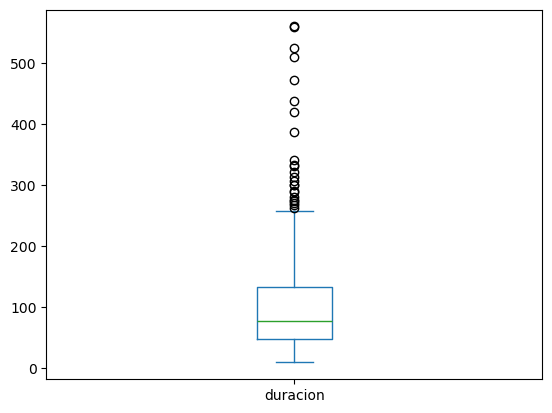

In [79]:
# Box plot de la duración 
df['duracion'].plot.box()

## Nulos

In [44]:
# Nulos
df_normal.isna().sum()

Video          0
Evento         0
PCB            0
Start_Frame    0
End_Frame      0
dtype: int64

## Duplicados

In [ ]:
# Videos con intro
normal_duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos", df_normal, 3)

In [53]:
# Videos con intro
df_normal_d = normal_duplicados.encontrar_duplicados()

[DUPLICADO] Normal_Videos075_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos076_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos077_x264.mp4 es similar a Normal_Videos074_x264.mp4
[DUPLICADO] Normal_Videos078_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos079_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos080_x264.mp4 es similar a Normal_Videos064_x264.mp4
[DUPLICADO] Normal_Videos104_x264.mp4 es similar a Normal_Videos101_x264.mp4
[DUPLICADO] Normal_Videos106_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos125_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos126_x264.mp4 es similar a Normal_Videos074_x264.mp4
[DUPLICADO] Normal_Videos128_x264.mp4 es similar a Normal_Videos073_x264.mp4
[DUPLICADO] Normal_Videos153_x264.mp4 es similar a Normal_Videos152_x264.mp4
[DUPLICADO] Normal_Videos212_x264.mp4 es similar a Normal_Videos211_x264.mp4

In [54]:
df_normal_d.shape

(34, 5)

In [58]:
# Elimina los videos con intro
df_normal = df_normal.drop(df_normal_d.index)

In [59]:
df_normal.shape

(396, 5)

In [60]:
# Duplicados 
normal_duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos", df_normal)

In [61]:
df_nd = normal_duplicados.encontrar_duplicados()

In [80]:
# Ver la duración de cada video
df_normal['duracion'] = df_normal.apply(lambda x: duracion_video(x['Video'], "Normal"), axis=1)

<Axes: >

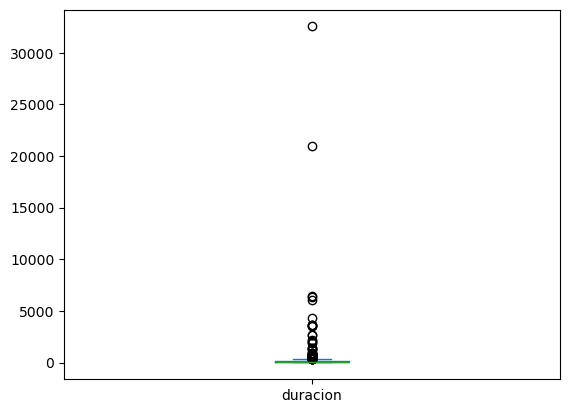

In [81]:
# Boxplot de la duración de los videos
df_normal['duracion'].plot(kind='box')

## Black and white

In [64]:
n_bw = BlackAndWhite("../data/Anomaly-Detection-Dataset/Anomaly-Videos", df_normal)

In [65]:
df_n_bw = n_bw.encontrar_bw() 

KeyboardInterrupt: 

In [63]:
df_normal.to_csv('../data/raw/normal.csv', index=False)